In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
#****************Data augmentation**************#

import albumentations as A
import cv2
PATH='./character_dataset/Training Data'

import os

#listing all sub directories
class_dirs=os.listdir(PATH)


def augment(img,path,img_name):
    
    transforms=[
        [A.Blur(blur_limit=(3,3),p=1)],#blur 1
        [A.Blur(blur_limit=(5,5),p=1)],#blur 2
        [A.Rotate(limit=(0,15),p=1)],#rotate the image clockwise
        [A.Rotate(limit=(-15,0),p=1)],#rotate the image anti-clockwise
        [A.Blur(blur_limit=(3,3),p=1),A.Rotate(limit=(-15,0),p=1)],#rotate anti-clockwise and blurr
        [A.Blur(blur_limit=(3,3),p=1),A.Rotate(limit=(0,15),p=1)],#rotate clockwise and blurr
    ]
    
    
    for i,t in enumerate(transforms):
        
        #defining transformation
        transform=A.Compose(t)
        
        #applying transformation
        aug_img=transform(image=img)['image']
        
        #augmented image name
        aug_img_name=f'{path}/{img_name}_aug_{i}.jpg'
        
        #saving file
        cv2.imwrite(aug_img_name,np.float32(aug_img))

        
#iterating over all directories
for d in class_dirs:
    
    #listing all images in sub directory
    files=os.listdir(os.path.join(PATH,d))
    
    #iterating over all images
    for file in files:
        
        #reading image
        img=cv2.imread(os.path.join(PATH,d,file))
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        img_name=file.split('.')[0]
        
        #apply data augmentation
        augment(img,os.path.join(PATH,d),img_name)
        
print("Data Augmentation Done!")
        
def delete_augmentations():
    #iterating over all directories
    for d in class_dirs:

        #listing all images in sub directory
        files=os.listdir(os.path.join(PATH,d))

        #iterating over all images
        for file in files:
            file_path=os.path.join(PATH,d,file)
            if "aug" in file:
                os.remove(file_path)
                
                

Data Augmentation Done!


In [33]:
#***************************DANGER**************************#
#****************For deleting augmentations*****************#
delete_augmentations()
print("Augmented data deleted")

Augmented data deleted


In [14]:
from itertools import chain


X=[]
Y=[]

#iterating over all directories
for d in class_dirs:
    
    #listing all images in sub directory
    files=os.listdir(os.path.join(PATH,d))
    
    #iterating over all images
    for file in files:
        
        #reading image
        img=cv2.imread(os.path.join(PATH,d,file))
        
        #binarizing image
        img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_bw=cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)[1]
        
        #flattening image and appending it
        X.append(list(chain.from_iterable(img_bw)))
        
        #appending label
        Y.append(file.split('_')[1])
        
print(len(Y))

864


In [15]:
print(f"no of images: {len(X)}")
print(f"no of dimensions: {len(X[0])}")

no of images: 864
no of dimensions: 784


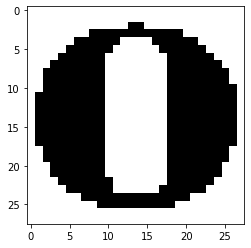

In [16]:
x0=np.reshape(X[0],(-1,28))
plt.imshow(x0, cmap="gray")

In [17]:
#converting to numpy array
X=np.array(X)

#normalising X
X=X/255

In [18]:
from keras.utils import np_utils


#converting Y[i] to int values: 0-9 and 10-35(A-Z)
for i in range(0,len(Y)):
    if Y[i].isalpha():
        Y[i]=ord(Y[i])-ord('A')+10
    else:
        Y[i]=int(Y[i])

#one hot encoding
Y=np_utils.to_categorical(Y,36)

In [23]:
#converting to numpy array
Y=np.array(Y)

Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [24]:
print(X.shape)
print(Y.shape)

(864, 784)
(864, 36)


In [26]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [27]:
output_dim=36
input_dim=784
batch_size=32
epochs=20

In [28]:
#Using Perceptron instead of CNN or multi-layer-perceptrons since data size is really small (864 images)

model=Sequential()
model.add(Dense(output_dim,input_dim=input_dim,activation='softmax'))

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=99)

print(len(X_train))
print(len(X_test))

648
216


In [32]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Epoch 1/20
21/21 [==============================] - 2s 31ms/step - loss: 3.6624 - accuracy: 0.1184 - val_loss: 2.1965 - val_accuracy: 0.5509
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 1.7498 - accuracy: 0.6952 - val_loss: 1.2001 - val_accuracy: 0.8194
Epoch 3/20
21/21 [==============================] - 0s 3ms/step - loss: 0.9258 - accuracy: 0.8886 - val_loss: 0.7524 - val_accuracy: 0.8889
Epoch 4/20
21/21 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.9374 - val_loss: 0.5407 - val_accuracy: 0.9213
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 0.3956 - accuracy: 0.9571 - val_loss: 0.4469 - val_accuracy: 0.9306
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 0.2961 - accuracy: 0.9783 - val_loss: 0.3672 - val_accuracy: 0.9491
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 0.2265 - accuracy: 0.9795 - val_loss: 0.3250 - val_accuracy: 0.9491
Epoch 8/20
21/21 [=

In [35]:
pred=model.evaluate(X_test,Y_test)
print("Score",pred[0])
print("Accuracy",pred[1])

7/7 [==============================] - 0s 998us/step - loss: 0.1557 - accuracy: 0.9769
Score 0.15568344295024872
Accuracy 0.9768518805503845


In [34]:
model.save('char_recog_model.h5')

In [53]:
def to_label(n):
    if n<=9:
        return str(n)
    
    return chr(n-10+ord('A'))

In [56]:
pred=model.predict(np.array([X_test[200]]))[0]

# Generate arg maxes for prediction
actual=np.argmax(Y_test[200])
pred = np.argmax(pred)

print(f"actual: {to_label(actual)}")
print(f"pred: {to_label(pred)}")

actual: V
pred: V
